# Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (click the restart button in the tool bar or select Kernel$\rightarrow$Restart in the menu bar) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

**Make sure you delete `raise NotImplementedError()`** (if existing) and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Stephen Shell"

**Don't modify the formal TEST cells!**

---

# Shapes on maps

You should import the packages that you need to run your code. For **each problem**, you need to **put all your codes in one single cell**. Add as many comments as you could.

### 1. Compare area of Greenland in different projections

Different projections preserve or distort different attributes – such as area – of the surface of Earth. Greenland is large, but it's hard to tell how large because of this distortion that often occurs in projections. 

1. Use geopandas to read in the `ne_50m_admin_0_countries` shapefile (NOTE: This file is the one in your `hw11` folder, NOT the one in your in-class material folder). Hint: can use gpd.read_file("ne_50m_admin_0_countries") directly.

2. Find the actual area of Greenland using an appropriate projection (we learned in the `maps.ipynb`, or you can find them [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)) and check it with the actual number.
3. When Greenland is in a projection that does not preserve area, the area will be different from reality. Compare the area of Greenland that you found with the area in two other projections: Robinson and Mercator. Note that you need to write down your comparison explicitly.

Your final products should be 
* a figure with subplots of each of the three projections showing the full world with Greenland plotted distinctly for comparison;
* a short summary of the area in each projection that includes a comparison of the numbers. Be sure to include units.

---

Grading rubric [14 points]:

* [2 pts] Set up all 3 projections (the equal-area projection on the first subplot, the Robinson projection on the second subplot, and the Mercator projection on the third subplot)
* [3 pts] Plots of projections are reasonable, with Greenland distinct with its own color different from other pologyons
* [7 pts] Area of Greenland is given in the title of the three subplots, one of which is the actual area of Greenland.
* [2 pts] Compare the area of Greenland in each projection

Below is what I made for your reference.

<img src="greenland.png" width=800 />

Text(0.5, 1.0, 'Mercator Projection 35.38 trillion sq. mi.')

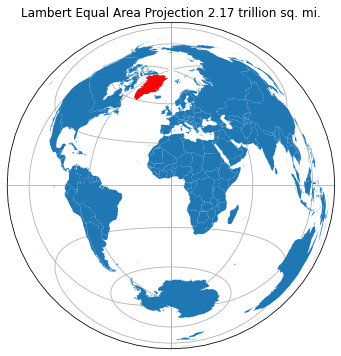

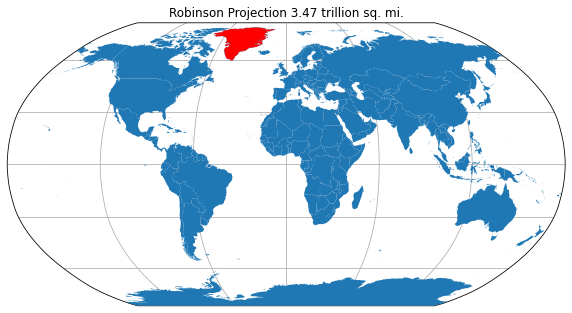

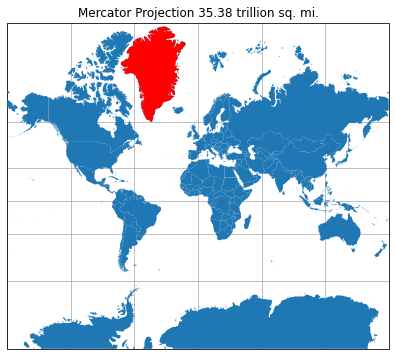

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

# import cartopy
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand for coordinate referecen system

%matplotlib inline

world_data = gpd.read_file("ne_50m_admin_0_countries")

greenland = world_data[world_data.ADMIN == "Greenland"]

gl_l  = greenland.to_crs(ccrs.LambertAzimuthalEqualArea().proj4_init)
gl_r = greenland.to_crs(ccrs.Robinson().proj4_init)
gl_m = greenland.to_crs(ccrs.Mercator().proj4_init)

l = round(gl_l.area.sum() / 10**12, 2)
r = round(gl_r.area.sum() / 10**12, 2)
m = round(gl_m.area.sum() / 10**12, 2)

lambert  = world_data.to_crs(ccrs.LambertAzimuthalEqualArea().proj4_init)
robinson = world_data.to_crs(ccrs.Robinson().proj4_init)
mercator = world_data.to_crs(ccrs.Mercator().proj4_init)

# The plot is in the Lambert Equal Area projection
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(projection=ccrs.LambertAzimuthalEqualArea())
lambert.plot(ax=ax1, transform=ccrs.LambertAzimuthalEqualArea(), zorder=3)
gl_l.plot(ax=ax1, transform=ccrs.LambertAzimuthalEqualArea(), zorder=3, color='red')
ax1.gridlines()
ax1.set_title(f'Lambert Equal Area Projection {l} trillion sq. mi.')

# The plot is in the Robinson projection
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(projection=ccrs.Robinson())
robinson.plot(ax=ax2, transform=ccrs.Robinson(), zorder=3)
gl_r.plot(ax=ax2, transform=ccrs.Robinson(), zorder=3, color='red')
ax2.gridlines()
ax2.set_title(f'Robinson Projection {r} trillion sq. mi.')
 
# The plot is in the Mercator projection
fig3 = plt.figure(figsize=(10, 6))
ax3 = fig3.add_subplot(projection=ccrs.Mercator())
mercator.plot(ax=ax3, transform=ccrs.Mercator(), zorder=3)
gl_m.plot(ax=ax3, transform=ccrs.Mercator(), zorder=3, color='red')
ax3.gridlines()
ax3.set_title(f'Mercator Projection {m} trillion sq. mi.')

# raise NotImplementedError()

### 2. Flyover states (graduate student problem)


What states do you fly over and see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

    LAX: 33.9425° N, 118.4081° W
    EWR: 40.6925° N, 74.1686° W

**Note: You will only need to create a single figure! Don't plot the elements below on separate figures!** <br>

Steps:
1. Set up a Mercator projection and create a map
1. Plot states (the `ne_110m_admin_1_states_provinces` shapefile) (NOTE: This file is the one in your `hw11` folder, NOT the one in your in-class material folder).
1. Plot the starting and ending locations
1. Plot the flight path (the `lons` and `lats` in the following cell) between the starting and ending locations
1. Create a buffer around the flight path representing area that might be visible to you from the plane (sight path). Assume that you could see 100km on either side of the plane. Be sure to first convert your flight path into projected coordinates (such as Mercator) before you do the buffer. Add the buffer to the plot. Hint: After creating the buffer in Mercator, you can then convert the buffer back to 4326 and do the intersection for the tasks below. 

1. Find intersections between the flight path and the state polygons and color these states differently in the plot.
1. Find intersections between the sight path and the state polygons and color these states differently in the plot.
1. Create and print out a list of the states that are flown over during the flight.

Be sure that your final map is clear, easy to read, and looks nice.

---

Grading rubric [19 points]:

* [2 pts] Set up projection successfully and create map
* [2 pts] Plot states and airport locations clearly. Set up the x and y extent to not show Alaksa and Hawaii
* [3 pts] Create flight path and add to plot
* [3 pts] Create buffer region and add to plot
* [6 pts] Find intersections between flight and sight paths with states, and plot each of them correctly
* [3 pts] Provide list of flown over states


Below is what I made for your reference.

<img src="flight_states.png" width=700 />

In [3]:
lons = [-118.4081, -116.53656281803954, -114.63494404602989, -112.70342143546311,
        -110.74234511851722, -108.75224911337924, -106.73386144433508, -104.6881124356053,
        -102.6161407277617, -100.51929657411526, -98.3991420049751, -96.25744750245255,
        -94.09618490844686, -91.91751639275596, -89.72377943401308, -87.51746790832203,
        -85.30120953200326, -83.07774005710772, -80.84987476165341, -78.62047790110475,
        -76.39243088444343, -74.1686]
lats = [33.9425, 34.62185468395183, 35.27195983702588, 35.89163680795418, 36.47971217805657,
        37.03502459436787, 37.5564322473648, 38.042820934293715, 38.493112624072936,
        38.9062744137114, 39.281327740305926, 39.61735768834621, 39.9135222108212,
        40.169061066104604, 40.38330426236194, 40.55567979862256, 40.68572049769913,
        40.773069741323866, 40.81748594212188, 40.818845619619054, 40.77714498701483, 40.6925]

In [4]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 